# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# To determine city based on latitude and longitude 
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
# Create empty lists to store the responses for the data
city_name_list = []
cloudiness_list = []
country_list =[]
date_list = []
humidity_list =[]
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval")
print("-----------------------------")

# Save config information and build query URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city in cities list, print the log of each city: 
for index, city in enumerate(cities, start = 1):
    try: 
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | jatai
Processing Record 2 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 3 of Set 1 | adrar
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | tevriz
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | husavik
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | gisborne
Processing Record 13 of Set 1 | awjilah
Processing Record 14 of Set 1 | shingu
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | vestmannaeyjar
City not found. Skipping...
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | srednekolymsk
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | krasnoselkup
Processing Record 21 of Set 1 | hilo
Processing Re

Processing Record 37 of Set 4 | tarko-sale
Processing Record 38 of Set 4 | iwanai
Processing Record 39 of Set 4 | waynesville
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | teknaf
Processing Record 42 of Set 4 | mount darwin
City not found. Skipping...
Processing Record 43 of Set 4 | vanavara
Processing Record 44 of Set 4 | fairbanks
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | den helder
Processing Record 47 of Set 4 | quang ngai
Processing Record 48 of Set 4 | kayerkan
Processing Record 49 of Set 4 | balykshi
Processing Record 50 of Set 4 | okha
Processing Record 0 of Set 5 | victoria
Processing Record 1 of Set 5 | kungurtug
Processing Record 2 of Set 5 | atbasar
Processing Record 3 of Set 5 | visby
Processing Record 4 of Set 5 | provideniya
City not found. Skipping...
Processing Record 5 of Set 5 | nusaybin
Processing Record 6 of Set 5 | mitsamiouli
Processing Record 7 

Processing Record 17 of Set 8 | inirida
Processing Record 18 of Set 8 | kavieng
Processing Record 19 of Set 8 | progreso
Processing Record 20 of Set 8 | gallup
Processing Record 21 of Set 8 | aklavik
Processing Record 22 of Set 8 | zhezkazgan
Processing Record 23 of Set 8 | kut chap
Processing Record 24 of Set 8 | gorontalo
Processing Record 25 of Set 8 | toktogul
Processing Record 26 of Set 8 | ambilobe
Processing Record 27 of Set 8 | moose factory
Processing Record 28 of Set 8 | bernalillo
Processing Record 29 of Set 8 | ilinskiy
Processing Record 30 of Set 8 | hailey
Processing Record 31 of Set 8 | nadym
Processing Record 32 of Set 8 | tommot
Processing Record 33 of Set 8 | lauro muller
Processing Record 34 of Set 8 | tecpan
Processing Record 35 of Set 8 | kortkeros
Processing Record 36 of Set 8 | hualmay
Processing Record 37 of Set 8 | port elizabeth
Processing Record 38 of Set 8 | innisfail
Processing Record 39 of Set 8 | constitucion
Processing Record 40 of Set 8 | avera
Processi

Processing Record 3 of Set 12 | kresna
Processing Record 4 of Set 12 | port lincoln
Processing Record 5 of Set 12 | buin
Processing Record 6 of Set 12 | sijunjung
Processing Record 7 of Set 12 | lifford
Processing Record 8 of Set 12 | grants
Processing Record 9 of Set 12 | plettenberg bay
Processing Record 10 of Set 12 | soyo
Processing Record 11 of Set 12 | dalbandin
Processing Record 12 of Set 12 | whitehorse
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a panda data frame for the data retrieved
weather_df = pd.DataFrame({"City": city_name_list,
                          "Lat": lat_list, "Lng": lng_list, "Max Temp": max_temp_list,
                          "Humidity": humidity_list, "Cloudiness": cloudiness_list,
                          "Wind Speed": wind_speed_list, "Country": country_list, "Date": date_list})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jatai,-17.88,-51.71,72.52,71,36,2.04,BR,1603343897
1,Ushuaia,-54.80,-68.30,48.20,57,75,6.11,AR,1603343673
2,Adrar,20.50,-10.07,80.94,20,11,5.12,MR,1603343897
3,Kapaa,22.08,-159.32,78.80,78,75,5.82,US,1603343898
4,Butaritari,3.07,172.79,82.08,71,39,8.68,KI,1603343898


In [9]:
# Generate descriptive stats for each of the columns 
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.121815,18.177557,60.045218,72.769634,51.518325,7.985864,1.603344e+09
std,33.350560,88.934029,20.693431,21.789103,37.604053,6.192876,8.740835e+01
min,-54.800000,-179.170000,6.640000,10.000000,0.000000,0.740000,1.603343e+09
25%,-8.470000,-58.740000,45.000000,61.000000,14.000000,3.690000,1.603344e+09
50%,22.930000,23.370000,62.640000,78.000000,54.000000,6.710000,1.603344e+09
75%,48.280000,90.670000,77.920000,89.000000,90.000000,10.330000,1.603344e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,74.710000,1.603344e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Sorting the values for Humidity from largest to smallest to see if there are any cities
# with the humidity greater than 100%
max_humidity = weather_df.sort_values("Humidity", ascending = False)
max_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
286,Mariestad,58.71,13.82,53.60,100,90,1.12,SE,1603343983
151,Laas,46.62,10.70,48.00,100,40,3.36,IT,1603343937
438,Hirara,24.80,125.28,80.60,100,75,10.29,JP,1603344028
445,Bud,39.45,-86.18,57.99,100,90,6.49,US,1603344030
175,Glendive,47.11,-104.71,32.00,100,90,9.17,US,1603343943
...,...,...,...,...,...,...,...,...,...
384,Bernalillo,35.05,-106.67,62.60,14,20,8.05,US,1603344013
116,Padampur,29.68,73.62,87.22,13,0,6.73,IN,1603343929
284,Yulara,-25.24,130.99,100.40,13,56,26.40,AU,1603343982
556,Calvinia,-31.47,19.78,66.20,12,0,10.29,ZA,1603344063


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
df = pd.read_csv("weatherData.csv")
df.head()

,cities,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
0,hermanus,-34.42,19.23,61.00,52,1017,1.01,13
1,belmonte,-15.86,-38.88,69.80,94,1016,6.93,20
2,chokurdakh,70.63,147.92,18.97,96,1003,4.63,13
3,provideniya,64.38,-173.30,24.80,73,1010,4.47,90
4,longyearbyen,78.22,15.64,32.00,95,1010,21.92,90


## Latitude vs. Temperature Plot

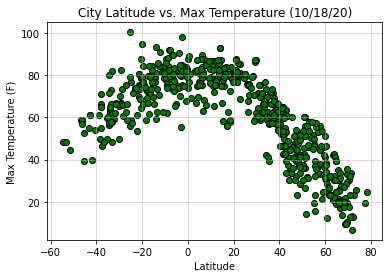

In [31]:
# Create Latitude vs Temperature scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor="green", edgecolor="black")

# Set title
plt.title("City Latitude vs. Max Temperature (10/18/20)")

# Set x axis Label
plt.xlabel("Latitude")

# Set y axis Label
plt.ylabel("Max Temperature (F)")

# Set grid lines
plt.grid(linestyle= '-', linewidth=1, alpha = 0.5)

plt.show()

## Latitude vs. Humidity Plot

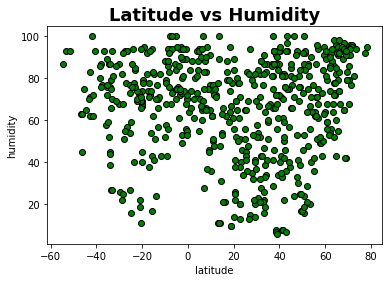

In [32]:
plt.scatter(df.latitude, df.humidity, facecolor="green", edgecolor="black")
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("Latitude vs Humidity", fontsize=18, fontweight="bold")

plt.show()

## Latitude vs. Cloudiness Plot

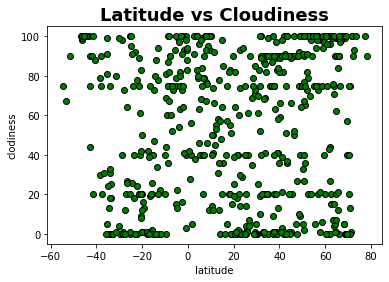

In [33]:
plt.scatter(df.latitude, df.cloudiness, facecolor="green", edgecolor="black")
plt.xlabel("latitude")
plt.ylabel("clodiness")
plt.title("Latitude vs Cloudiness", fontsize=18, fontweight="bold")

plt.show()

## Latitude vs. Wind Speed Plot

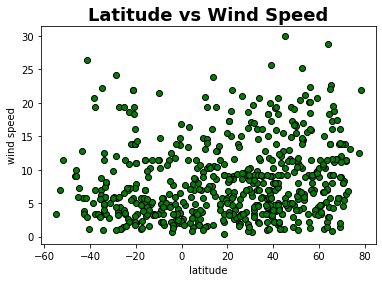

In [35]:
plt.scatter(df.latitude, df.wind_speed, facecolor="green", edgecolor="black")
plt.xlabel("latitude")
plt.ylabel("wind speed")
plt.title("Latitude vs Wind Speed", fontsize=18, fontweight="bold")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

In [16]:
northenHemi_mask = df.latitude >= 0
df_north = df.loc[northenHemi_mask].reset_index(drop=True)

df_north.head()

,cities,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
0,chokurdakh,70.63,147.92,18.97,96,1003,4.63,13
1,provideniya,64.38,-173.30,24.80,73,1010,4.47,90
2,longyearbyen,78.22,15.64,32.00,95,1010,21.92,90
3,kumukh,42.17,47.12,54.66,22,1015,1.77,0
4,khatanga,71.97,102.50,19.63,95,1016,6.33,90


In [17]:
southernHemi_mask = df.latitude < 0
df_south = df.loc[southernHemi_mask].reset_index(drop=True)

df_south.head()

,cities,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
0,hermanus,-34.42,19.23,61.0,52,1017,1.01,13
1,belmonte,-15.86,-38.88,69.8,94,1016,6.93,20
2,olinda,-8.01,-34.86,77.0,94,1013,4.70,90
3,ushuaia,-54.80,-68.30,44.6,87,1004,3.40,75
4,punta arenas,-53.15,-70.92,35.6,93,1007,6.93,67


In [18]:
import seaborn as sn

In [19]:
north_corrs = df_north.corr()
north_corrs

,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
latitude,1.000000,-0.015512,-0.864766,0.208493,-0.237231,0.167561,0.084798
longitude,-0.015512,1.000000,0.195760,-0.204416,-0.270358,0.078688,0.050028
temperature,-0.864766,0.195760,1.000000,-0.488433,0.061090,-0.080654,-0.136033
humidity,0.208493,-0.204416,-0.488433,1.000000,-0.005123,-0.004581,0.269190
pressure,-0.237231,-0.270358,0.061090,-0.005123,1.000000,-0.049065,-0.228362
wind_speed,0.167561,0.078688,-0.080654,-0.004581,-0.049065,1.000000,0.071793
cloudiness,0.084798,0.050028,-0.136033,0.269190,-0.228362,0.071793,1.000000


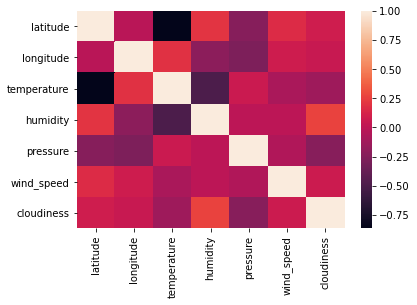

In [20]:
sn.heatmap(north_corrs)

In [21]:
south_corrs = df_south.corr()
south_corrs

,latitude,longitude,temperature,humidity,pressure,wind_speed,cloudiness
latitude,1.000000,-0.132440,0.665402,0.093859,-0.202880,-0.133613,0.111151
longitude,-0.132440,1.000000,0.214337,-0.381119,-0.033675,0.274999,0.096610
temperature,0.665402,0.214337,1.000000,-0.164131,-0.317694,0.202751,0.039025
humidity,0.093859,-0.381119,-0.164131,1.000000,-0.156152,-0.248246,0.190395
pressure,-0.202880,-0.033675,-0.317694,-0.156152,1.000000,0.054694,-0.230996
wind_speed,-0.133613,0.274999,0.202751,-0.248246,0.054694,1.000000,-0.107965
cloudiness,0.111151,0.096610,0.039025,0.190395,-0.230996,-0.107965,1.000000


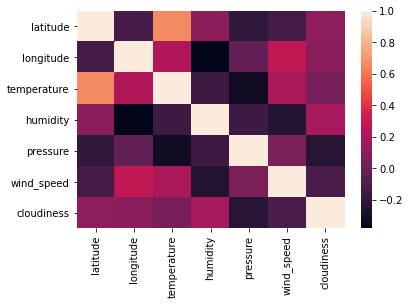

In [22]:
sn.heatmap(south_corrs)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7478198324027903


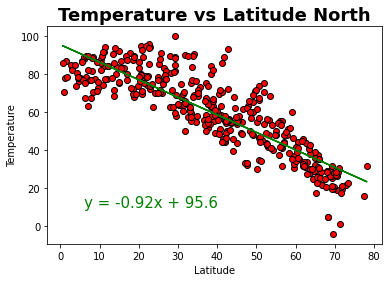

In [39]:
x_values = df_north["latitude"]
y_values = df_north["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolor="red", edgecolor="black")
plt.plot(x_values,regress_values,"r-", color="green")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude North", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4427591691270394


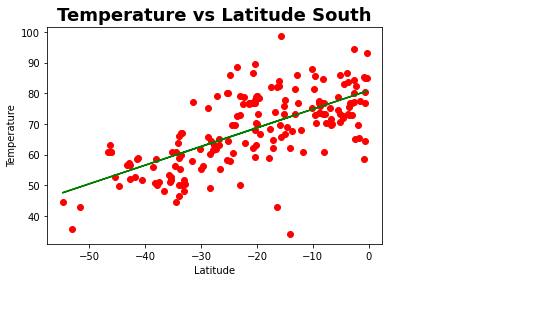

In [40]:
x_values = df_south["latitude"]
y_values = df_south["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="red")
plt.plot(x_values,regress_values,"r-", color="green")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Temperature vs Latitude South", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04346922083313123


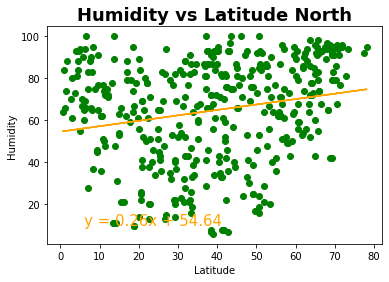

In [25]:
x_values = df_north["latitude"]
y_values = df_north["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude North", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008809515878679227


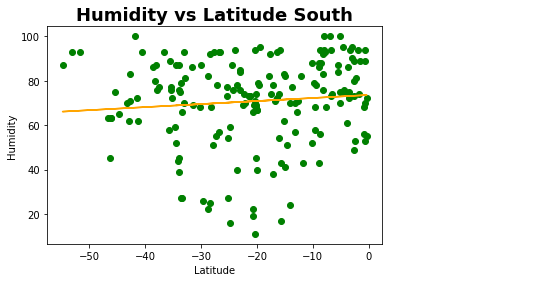

In [26]:
x_values = df_south["latitude"]
y_values = df_south["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude South", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007190750046366299


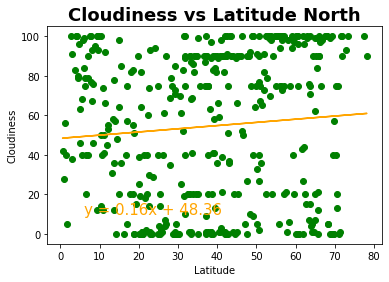

In [27]:
x_values = df_north["latitude"]
y_values = df_north["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude North", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012354644101641143


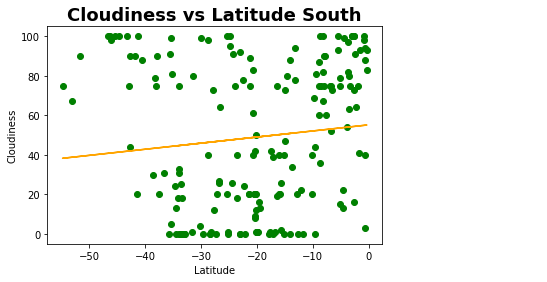

In [28]:
x_values = df_south["latitude"]
y_values = df_south["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude South", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.028076600346340054


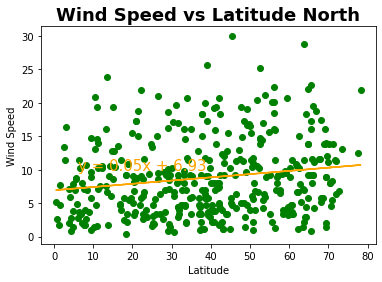

In [29]:
x_values = df_north["latitude"]
y_values = df_north["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude North", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017852419148460155


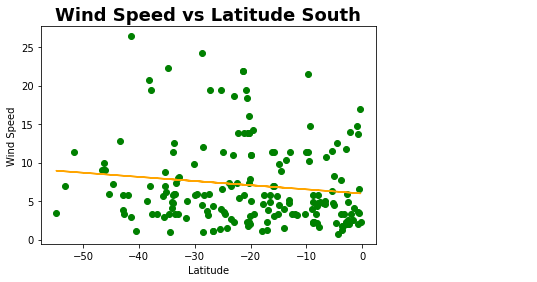

In [30]:
x_values = df_south["latitude"]
y_values = df_south["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="green")
plt.plot(x_values,regress_values,"r-", color="orange")
plt.annotate(line_eq,(6,10),fontsize=15,color="orange")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude South", fontsize=18, fontweight="bold")
print(f"The r-squared is: {rvalue**2}")
plt.show()